**Step 1 - Init python stuff**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import sys
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import TensorBoard

from modules.models    import DCGAN
from modules.callbacks import ImagesCallback

**Step 2 - Parameters**

In [5]:
latent_dim    = 128

scale         = 1
epochs        = 5
batch_size    = 32
num_img       = 12
fit_verbosity = 1

**Step 3 - Load dataset and have a look**

In [6]:
# Charger les données
x_data = np.load('data_sheep.npy')

In [7]:
print('Original dataset shape : ',x_data.shape)

Original dataset shape :  (126121, 784)


In [8]:
n=int(scale*len(x_data))
x_data = x_data[:n]
print('Rescaled dataset shape : ',x_data.shape)

Rescaled dataset shape :  (126121, 784)


In [9]:
# Normalize, reshape and shuffle
x_data = x_data/255
x_data = x_data.reshape(-1,28,28,1)
np.random.shuffle(x_data)
print('Final dataset shape    : ',x_data.shape)

Final dataset shape    :  (126121, 28, 28, 1)


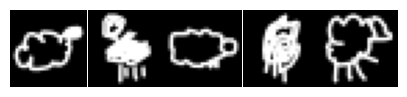

In [10]:
# Définir les paramètres d'affichage
indices = range(72)
columns = 5
x_size = 1
y_size = 1
y_padding = 0

# Créer une sous-figure avec les paramètres spécifiés
fig, axs = plt.subplots(y_size, columns, figsize=(x_size * columns, y_size))

# Boucle sur les indices spécifiés
for i, idx in enumerate(indices):
    # Obtenir l'image du tableau NumPy
    image = x_data[idx].reshape(28, 28)  # Assurez-vous d'ajuster la forme selon vos données

    # Afficher l'image
    ax = axs[i % columns] if y_size == 1 else axs[i // columns, i % columns]
    ax.imshow(image, cmap='gray')
    ax.axis('off')

# Ajuster l'espacement entre les sous-graphiques
plt.subplots_adjust(wspace=0, hspace=y_padding)

# Sauvegarder l'image
plt.savefig('01-Sheeps.png')

# Afficher l'image
plt.show()


**Step 4 - Create a discriminator**

In [11]:
 inputs  = keras.Input(shape=(28, 28, 1))
x       = layers.Conv2D(64, kernel_size=4, strides=2, padding="same")(inputs)
x       = layers.LeakyReLU(alpha=0.2)(x)
x       = layers.Conv2D(128, kernel_size=4, strides=2, padding="same")(x)
x       = layers.LeakyReLU(alpha=0.2)(x)
x       = layers.Conv2D(128, kernel_size=4, strides=2, padding="same")(x)
x       = layers.LeakyReLU(alpha=0.2)(x)
x       = layers.Flatten()(x)
x       = layers.Dropout(0.2)(x)
z       = layers.Dense(1, activation="sigmoid")(x)

discriminator = keras.Model(inputs, z, name="discriminator")
discriminator.summary()

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 64)        1088      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         131200    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         262272    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 4, 4, 128)       

**Step 5 - Create a generator**

In [12]:
inputs  = keras.Input(shape=(latent_dim,))
x       = layers.Dense(7 * 7 * 64)(inputs)
x       = layers.Reshape((7, 7, 64))(x)
x       = layers.UpSampling2D()(x)
x       = layers.Conv2D(128,  kernel_size=3, strides=1, padding='same', activation='relu')(x)
x       = layers.UpSampling2D()(x)
x       = layers.Conv2D(256,  kernel_size=3, strides=1, padding='same', activation='relu')(x)
outputs = layers.Conv2D(1,    kernel_size=5, strides=1, padding="same", activation="sigmoid")(x)

generator = keras.Model(inputs, outputs, name="generator")
generator.summary()

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128)]             0         
                                                                 
 dense_1 (Dense)             (None, 3136)              404544    
                                                                 
 reshape (Reshape)           (None, 7, 7, 64)          0         
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 up_sampling2d_1 (UpSamplin  (None, 28, 28, 128)       0         
 g2D)                                                    

In [13]:
gan = DCGAN(discriminator=discriminator, generator=generator, latent_dim=latent_dim)

Fidle DCGAN is ready :-)  latent dim = 128


In [14]:
gan.compile(
    discriminator_optimizer = keras.optimizers.Adam(learning_rate=0.0001),
    generator_optimizer     = keras.optimizers.Adam(learning_rate=0.0001),
    loss_function           = keras.losses.BinaryCrossentropy(),
)

In [15]:
run_dir_name = "images-4"

In [17]:
# Vérifier si le répertoire existe déjà
if not os.path.exists(run_dir_name):
    # Créer le répertoire
    os.makedirs(run_dir_name)
    print(f"Répertoire '{run_dir_name}' créé avec succès.")
else:
    print(f"Le répertoire '{run_dir_name}' existe déjà.")

Le répertoire 'images-4' existe déjà.


La déconnexion de Google Colab peut être due à plusieurs raisons. Google Colab est un service gratuit basé sur le cloud, et il peut y avoir des limitations en termes de ressources, de temps d'exécution et d'inactivité. Voici quelques raisons courantes pour lesquelles une connexion Google Colab pourrait être interrompue :

**Durée d'exécution maximale** : Les sessions Google Colab ont une durée d'exécution maximale, après quoi elles sont automatiquement interrompues. Cela peut varier, mais la durée d'exécution maximale standard est généralement de 12 heures.

**Inactivité** : Si vous ne travaillez pas activement dans la session Colab pendant un certain temps, la session peut être interrompue en raison d'inactivité.

**Limite de ressources** : Les sessions Colab ont des limitations en termes de ressources, y compris la mémoire RAM et la puissance de calcul. Si votre code utilise trop de ressources, la session peut être interrompu**


**Limite d'utilisation quotidienne** : Google Colab peut également avoir des limites d'utilisation quotidienne en termes de ressources et de temps d'exécution pour éviter une utilisation abusive du service.



In [18]:
imagesCallback = ImagesCallback(num_img=num_img, latent_dim=latent_dim, run_dir=run_dir_name)

history = gan.fit( x_data,
                   epochs=epochs,
                   batch_size=batch_size,
                   callbacks=[imagesCallback],
                   verbose=fit_verbosity )

#gan.save(f'{run_dir}/models/model.h5')

Epoch 1/5
3942/3942 [==============================] - 81s 17ms/step - d_loss: 0.2288 - g_loss: 4.7969
Epoch 2/5
3942/3942 [==============================] - 68s 17ms/step - d_loss: 0.5380 - g_loss: 1.1552
Epoch 3/5
3942/3942 [==============================] - 67s 17ms/step - d_loss: 0.5154 - g_loss: 1.1993
Epoch 4/5
3942/3942 [==============================] - 68s 17ms/step - d_loss: 0.5555 - g_loss: 1.0688
Epoch 5/5
3942/3942 [==============================] - 67s 17ms/step - d_loss: 0.5686 - g_loss: 1.0367


textarea

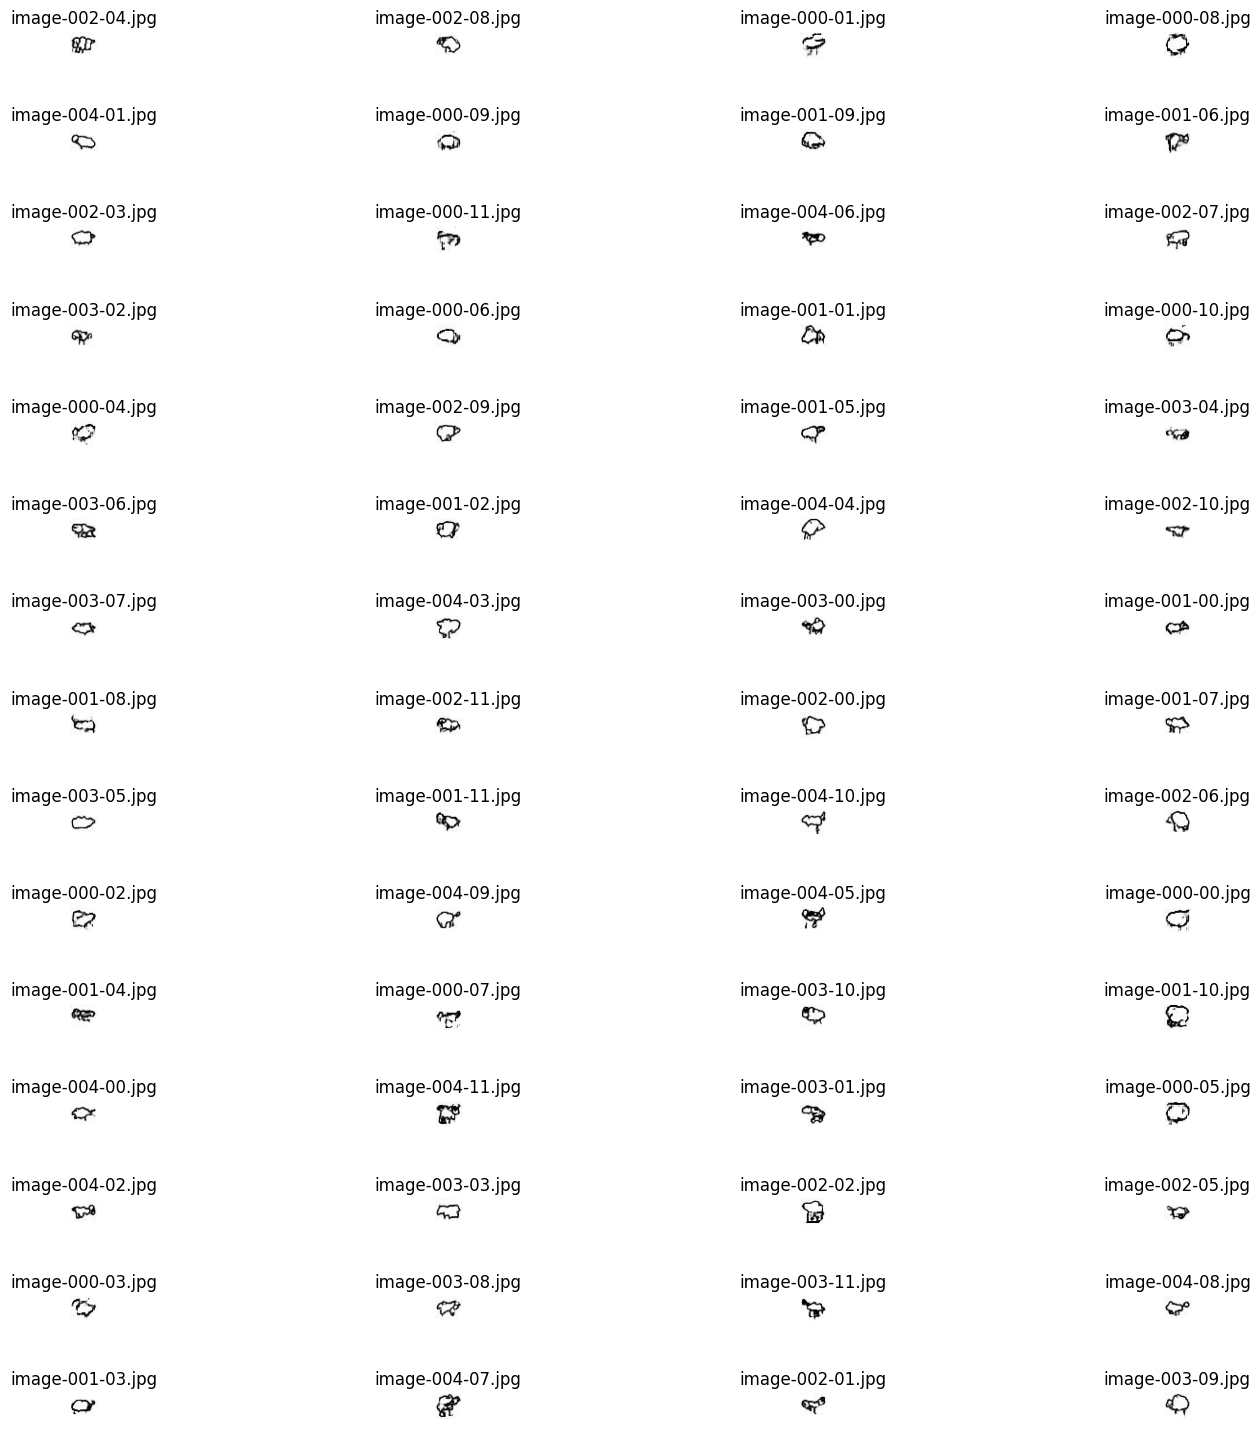

In [19]:
from matplotlib.image import imread

# Définir le chemin du dossier contenant les images
folder_path = 'images-4'

# Récupérer la liste des fichiers d'images dans le dossier
image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]

# Définir le nombre de colonnes pour l'affichage
num_columns = 4

# Calculer le nombre de lignes en fonction du nombre d'images et du nombre de colonnes
num_rows = (len(image_files) + num_columns - 1) // num_columns

# Créer une figure et des sous-plots
fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, 15))

# Ajuster l'espacement entre les sous-plots
fig.tight_layout(pad=3.0)

# Boucle sur les fichiers d'images et les afficher dans les sous-plots
for i, image_file in enumerate(image_files):
    img = imread(os.path.join(folder_path, image_file))
    ax = axs[i // num_columns, i % num_columns]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(image_file)

# Afficher la figure
plt.show()
